In [231]:
import pandas as pd

In [232]:
pwd

'/content/drive/My Drive/Colab Notebooks/powerjsv'

In [233]:
cd /content/drive/MyDrive/Colab Notebooks/powerjsv

/content/drive/MyDrive/Colab Notebooks/powerjsv


In [234]:
df=pd.read_csv('Gatun_Lake_Water_Level_Monthly_Mean.csv')
df

,DATE_LOG,GATUN_LAKE_LEVEL(FEET)
0,1965-01-31,86.363548
1,1965-02-28,85.753571
2,1965-03-31,84.521935
3,1965-04-30,83.380667
4,1965-05-31,82.677742
...,...,...
696,2024-01-31,81.437742
697,2024-02-29,80.986207
698,2024-03-31,80.518065
699,2024-04-30,80.302000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE_LOG                701 non-null    object 
 1   GATUN_LAKE_LEVEL(FEET)  701 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [116]:
df['DATE_LOG']

0      1965-01-31
1      1965-02-28
2      1965-03-31
3      1965-04-30
4      1965-05-31
          ...    
696    2024-01-31
697    2024-02-29
698    2024-03-31
699    2024-04-30
700    2024-05-31
Name: DATE_LOG, Length: 701, dtype: object

In [235]:
# Convert 'DATE_LOG' to datetime format
df['DATE_LOG'] = pd.to_datetime(df['DATE_LOG'])

In [238]:
df

,DATE_LOG,GATUN_LAKE_LEVEL(FEET)
0,1965-01-31,86.363548
1,1965-02-28,85.753571
2,1965-03-31,84.521935
3,1965-04-30,83.380667
4,1965-05-31,82.677742
...,...,...
696,2024-01-31,81.437742
697,2024-02-29,80.986207
698,2024-03-31,80.518065
699,2024-04-30,80.302000


In [239]:
# Set 'DATE_LOG' as the index of the dataframe
df.set_index('DATE_LOG', inplace=True)

In [120]:
# df.index = df.index.to_period('D')

In [240]:
import pandas as pd
import json
import requests
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [122]:
len(df)

701

In [123]:
df[:560]

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,86.363548
1965-02-28,85.753571
1965-03-31,84.521935
1965-04-30,83.380667
1965-05-31,82.677742
...,...
2012-04-30,84.474000
2012-05-31,85.144839
2012-06-30,85.388333


In [124]:
df[560:]

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
2012-09-30,85.653667
2012-10-31,86.617419
2012-11-30,87.042000
2012-12-31,87.358065
2013-01-31,86.981613
...,...
2024-01-31,81.437742
2024-02-29,80.986207
2024-03-31,80.518065


<Axes: xlabel='DATE_LOG'>

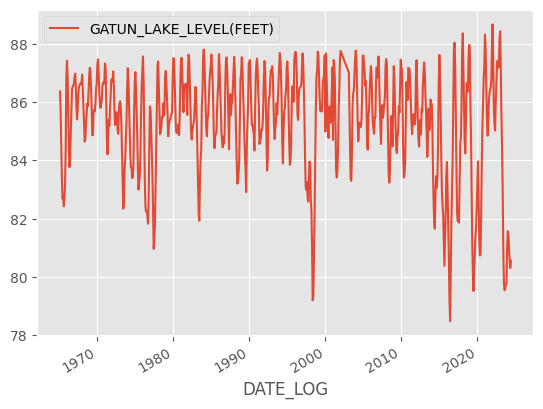

In [125]:
plt.style.use('ggplot')
df.plot()

In [126]:
ma_trend_12=df.rolling(window=12,center=True).mean()

In [129]:
ma_trend_12

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,NaN
1965-02-28,NaN
1965-03-31,NaN
1965-04-30,NaN
1965-05-31,NaN
...,...
2024-01-31,NaN
2024-02-29,NaN
2024-03-31,NaN


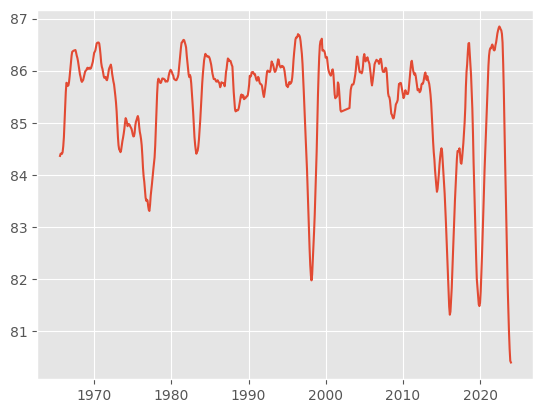

In [128]:
plt.plot(ma_trend_12)

TypeError: float() argument must be a string or a real number, not 'Period'

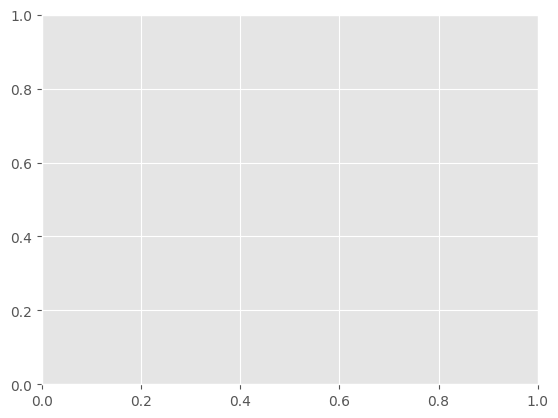

In [85]:
ma_trend_12=df.rolling(window=12,center=True).mean()
plt.plot(ma_trend_12)
# plt.plot(df)

In [59]:
result1 = seasonal_decompose(df['GATUN_LAKE_LEVEL(FEET)'], model = 'additive',period=1)

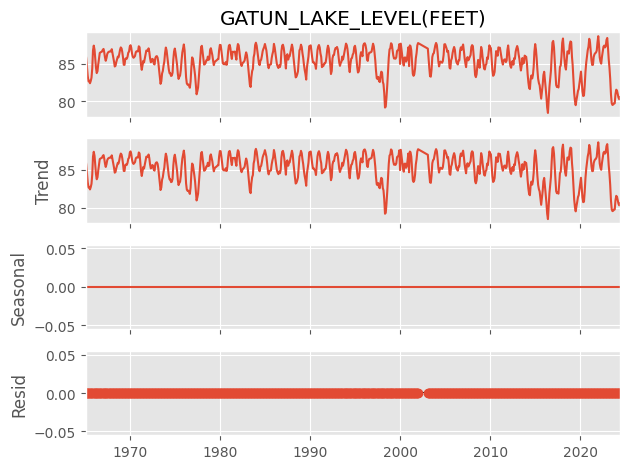

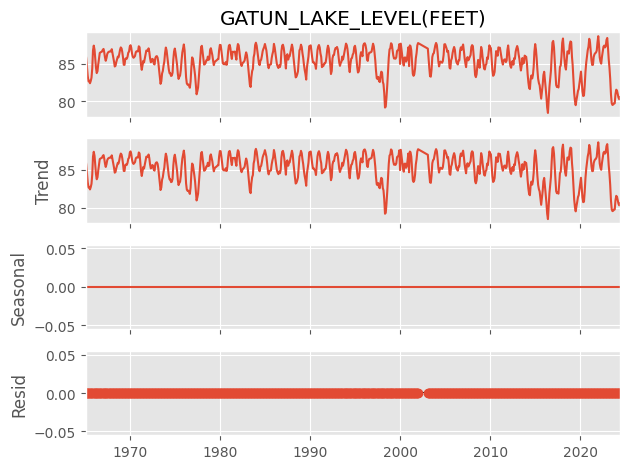

In [60]:
result1.plot()

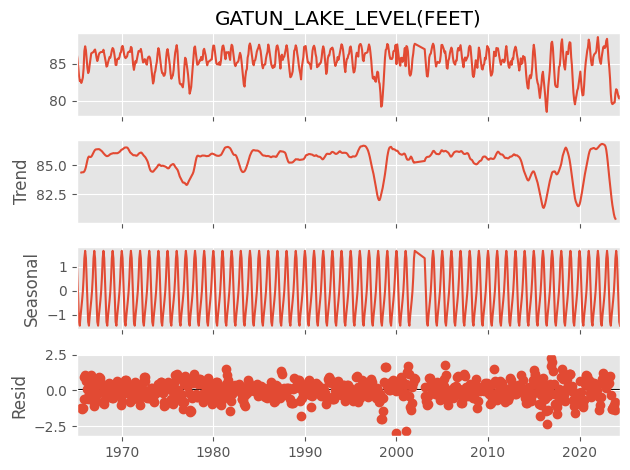

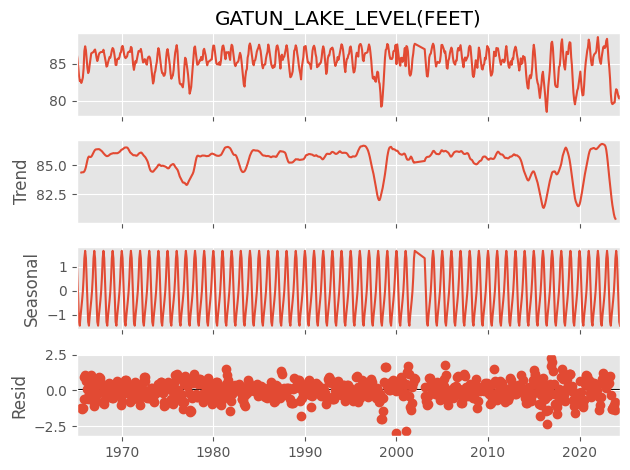

In [130]:
result12 = seasonal_decompose(df['GATUN_LAKE_LEVEL(FEET)'], model = 'additive',period=12)
result12.plot()

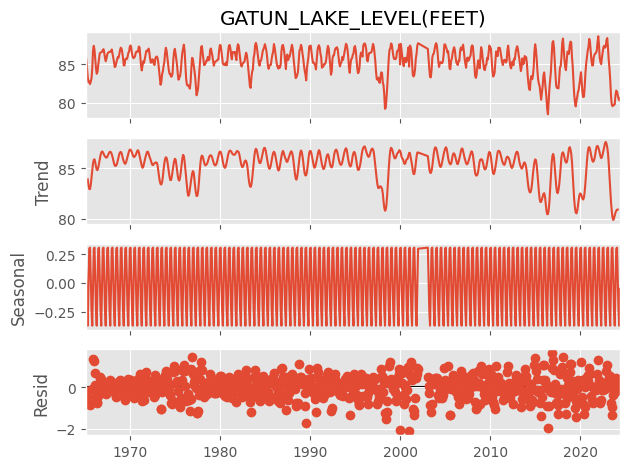

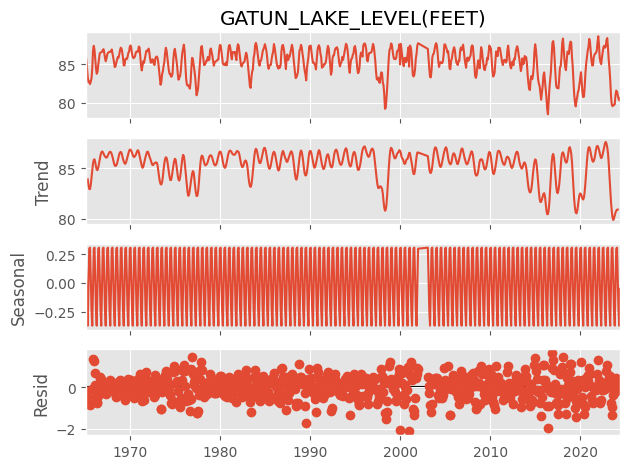

In [62]:
result6 = seasonal_decompose(df['GATUN_LAKE_LEVEL(FEET)'], model = 'additive',period=6)
result6.plot()

In [131]:
df_removed=df['GATUN_LAKE_LEVEL(FEET)']-result12.seasonal-result12.trend
df_removed=df_removed.dropna()

<Axes: xlabel='DATE_LOG'>

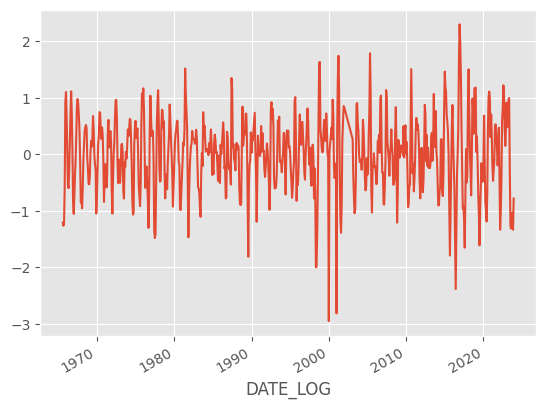

In [132]:
df_removed.plot()

Deseasonalized

In [133]:
df_deseasonalized=df['GATUN_LAKE_LEVEL(FEET)']-result12.seasonal
df_deseasonalized.dropna()

DATE_LOG
1965-01-31    84.992216
1965-02-28    85.233636
1965-03-31    84.968937
1965-04-30    84.691333
1965-05-31    84.147344
                ...    
2024-01-31    80.066410
2024-02-29    80.466272
2024-03-31    80.965066
2024-04-30    81.612666
2024-05-31    82.021102
Length: 701, dtype: float64

<Axes: xlabel='DATE_LOG'>

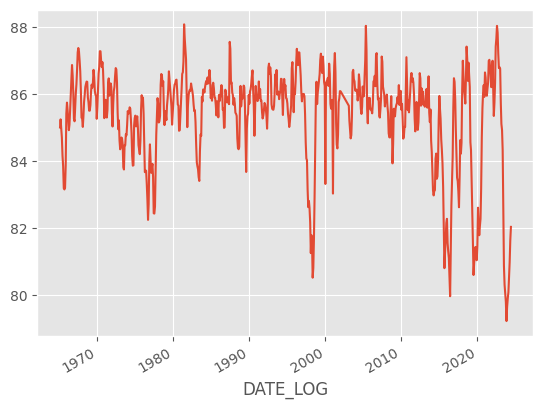

In [134]:
df_deseasonalized.plot()

In [135]:
from statsmodels.tsa.api import Holt

In [136]:
Holt3=Holt(df_removed, initialization_method="estimated",damped_trend=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
Holt3=Holt(df_deseasonalized, initialization_method="estimated",damped_trend=True).fit()

In [75]:
fcast3 = Holt3.forecast(12).rename(r"Additive damped trend")

In [76]:
Holt3.params

{'smoothing_level': 0.9999999848531873,
 'smoothing_trend': 3.766202295034033e-11,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9717238344783754,
 'initial_level': 84.96501839554574,
 'initial_trend': 0.02784047983583478,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

TypeError: float() argument must be a string or a real number, not 'Period'

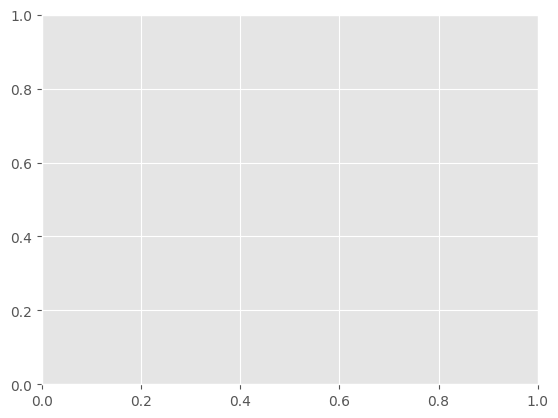

In [77]:
plt.plot(fcast3)

TypeError: float() argument must be a string or a real number, not 'Period'

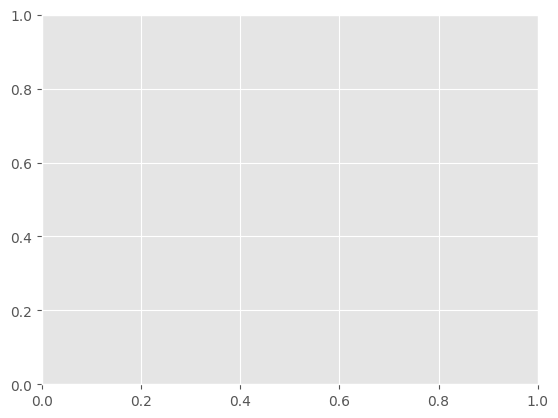

In [78]:
plt.plot(fcast3)
plt.plot(df_deseasonalized)

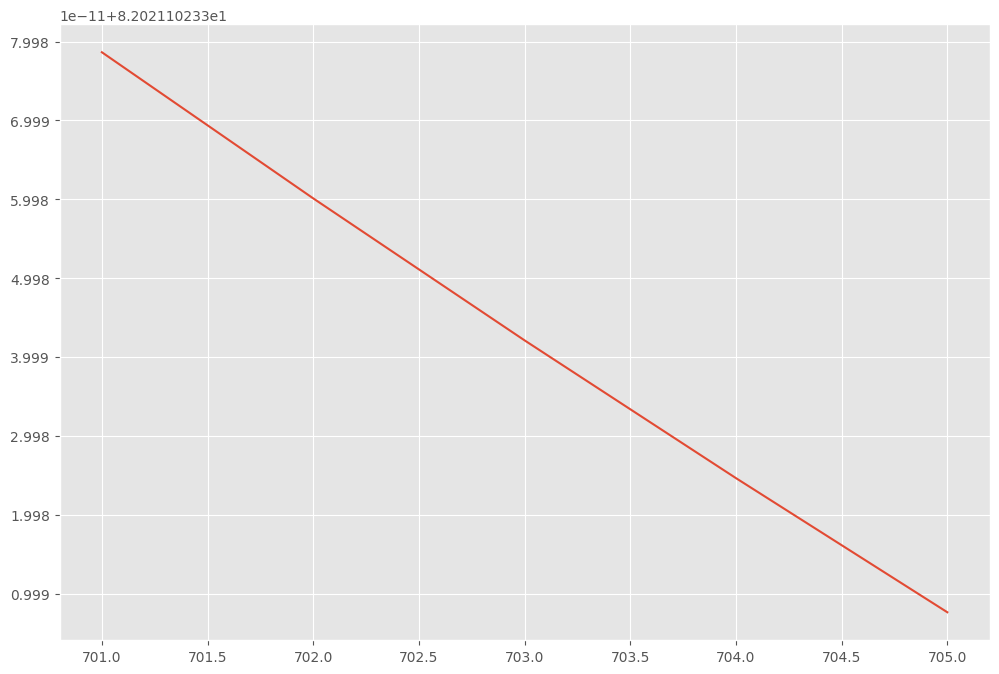

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fcast3)

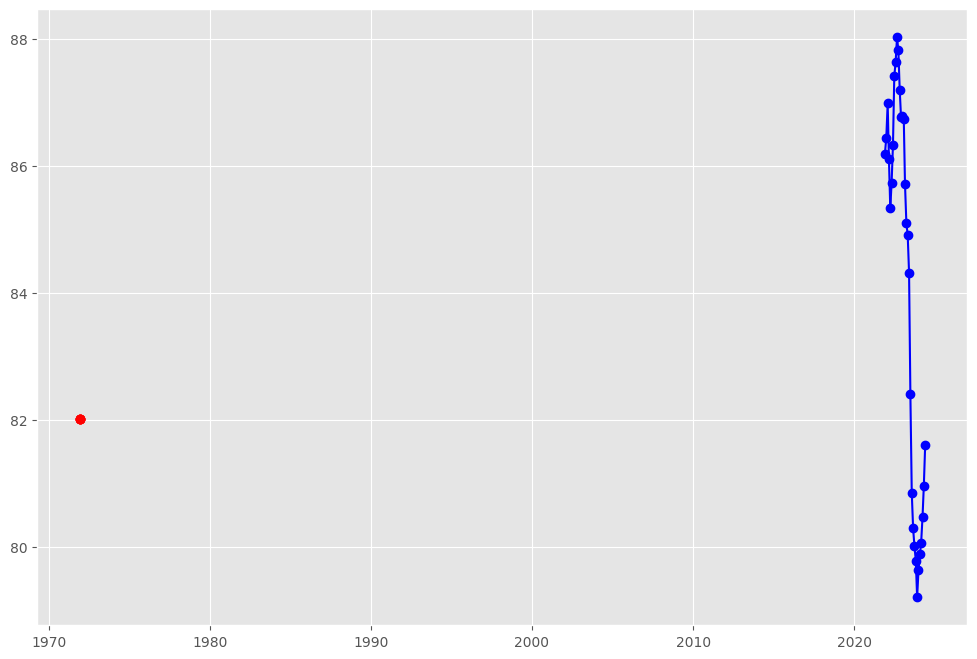

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(Holt3.fittedvalues[-31:], marker="o", color="Blue")
(line2,) = plt.plot(fcast3, marker="o", color="red")

dkflak

ar

In [139]:
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [148]:
df

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,86.363548
1965-02-28,85.753571
1965-03-31,84.521935
1965-04-30,83.380667
1965-05-31,82.677742
...,...
2024-01-31,81.437742
2024-02-29,80.986207
2024-03-31,80.518065


(75.0, 95.0)

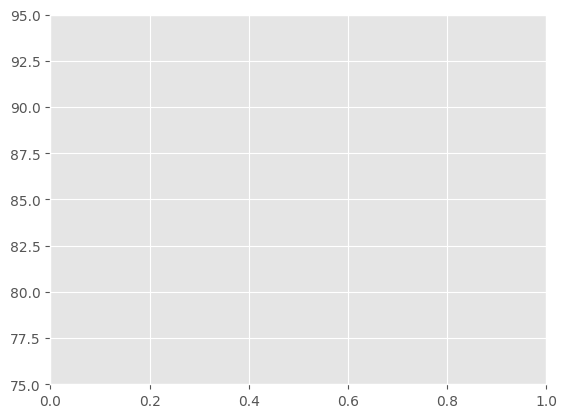

In [142]:
plt.ylim(75,95)

In [149]:
df.index

DatetimeIndex(['1965-01-31', '1965-02-28', '1965-03-31', '1965-04-30',
               '1965-05-31', '1965-06-30', '1965-07-31', '1965-08-31',
               '1965-09-30', '1965-10-31',
               ...
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
               '2024-04-30', '2024-05-31'],
              dtype='datetime64[ns]', name='DATE_LOG', length=701, freq=None)

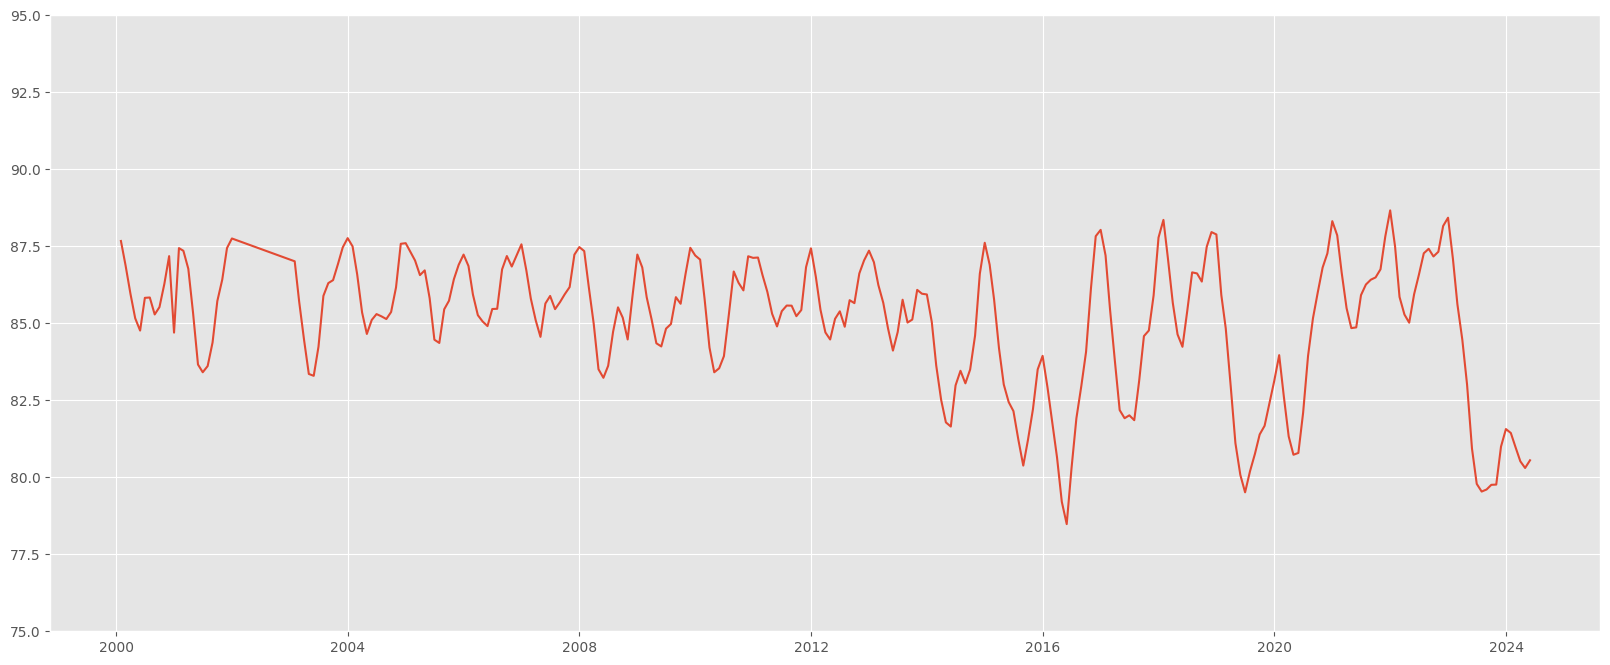

In [151]:
plt.figure(figsize=(20,8))
plt.ylim(75,95)
plt.plot(df[df.index>='2000-01-31'])

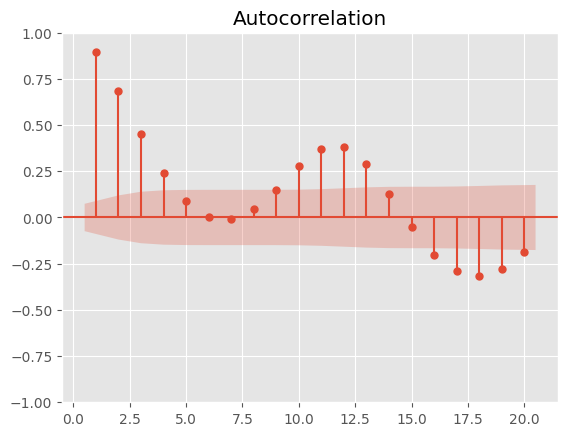

In [153]:
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=20,zero=False);

In [156]:
df_log=np.log(df)
df_log

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,4.458566
1965-02-28,4.451478
1965-03-31,4.437011
1965-04-30,4.423416
1965-05-31,4.414950
...,...
2024-01-31,4.399839
2024-02-29,4.394279
2024-03-31,4.388482


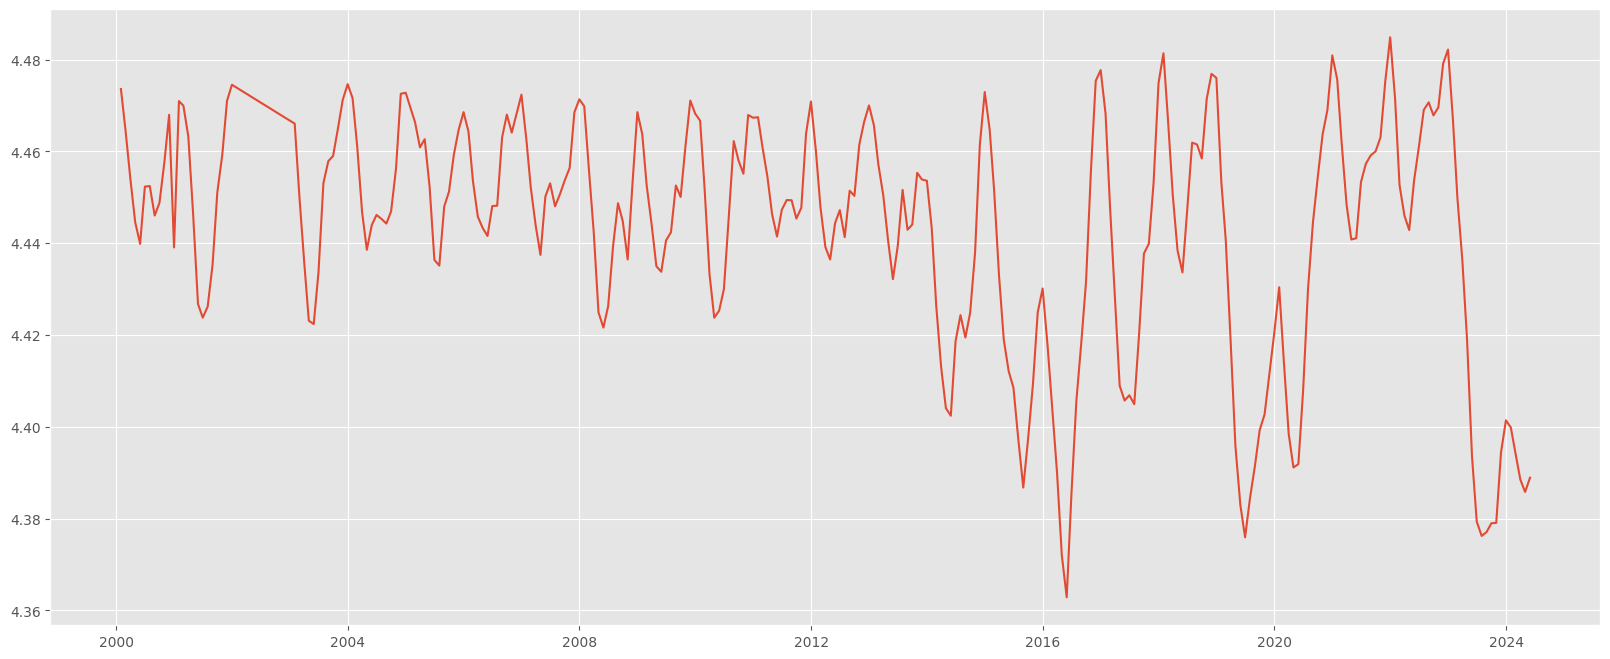

In [157]:
df_log=np.log(df)
plt.figure(figsize=(20,8))
plt.plot(df_log[df_log.index>='2000-01-31'])

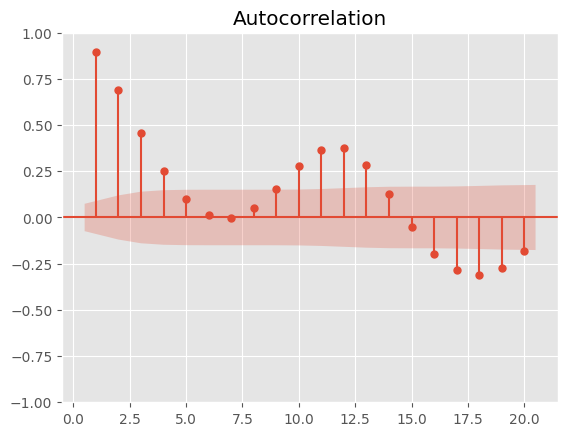

In [158]:
sm.graphics.tsa.plot_acf(df_log.dropna().values.squeeze(), lags=20,zero=False);

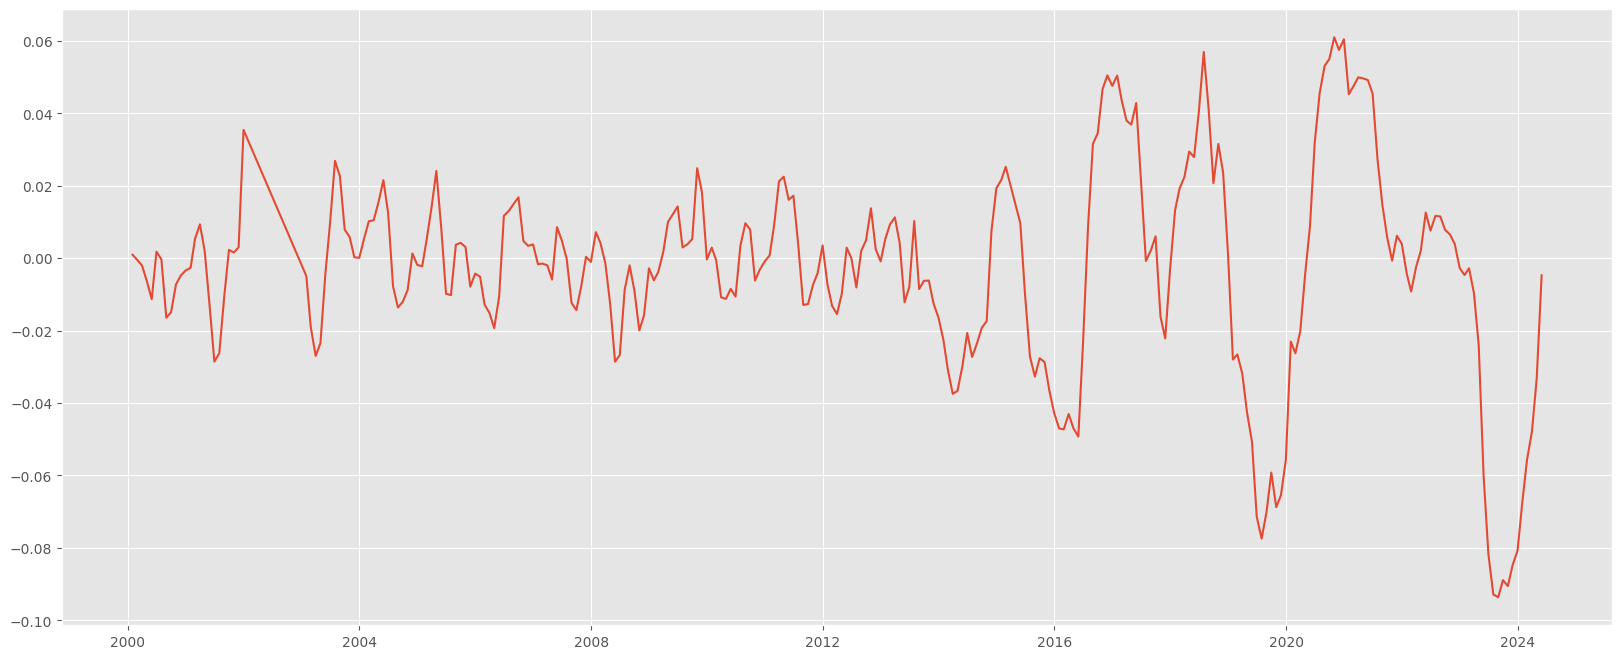

In [165]:
df_transformed=df_log.diff(12) # seasonality 에 대해 차분
df_transformed.dropna()
plt.figure(figsize=(20,8))
plt.plot(df_transformed[df_transformed.index>='2000-01-31'])



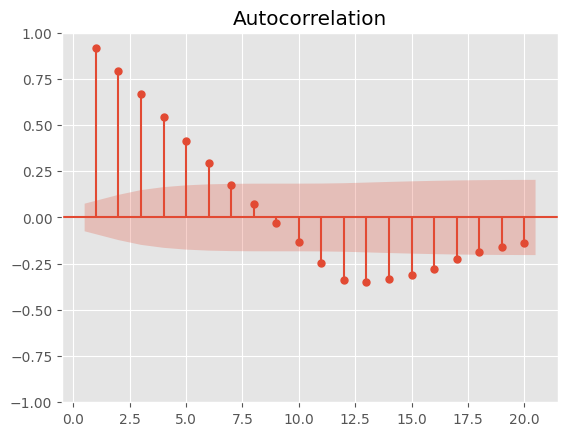

In [166]:
sm.graphics.tsa.plot_acf(df_transformed.dropna().values.squeeze(), lags=20,zero=False);

In [167]:
df_final=df_transformed.diff()
df_final=df_final.dropna()

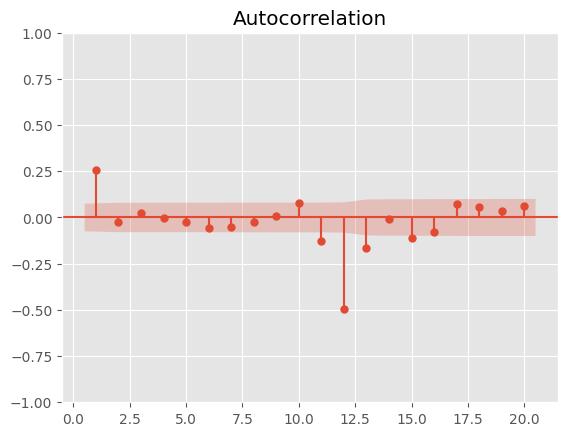

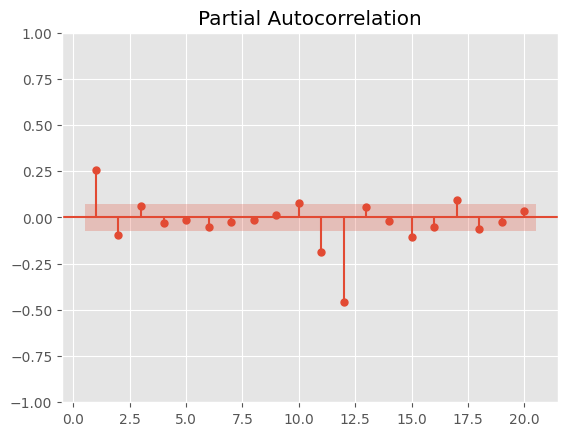

In [169]:
sm.graphics.tsa.plot_acf(df_final.values.squeeze(), lags=20,zero=False);
sm.graphics.tsa.plot_pacf(df_final.values.squeeze(), lags=20,zero=False);

In [170]:
from statsmodels.tsa.stattools import adfuller

#Original
print("Original Data")
dftest = adfuller(df['GATUN_LAKE_LEVEL(FEET)'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

#df_log
print("Log Transformed")
dftest = adfuller(df_log.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

#log+differencing
print("Log+Differencing")
dftest = adfuller(df_final, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

Original Data
Test statistic = -5.631
P-value = 0.000
Critical values :
	1%: -3.4399324443722814 - The data is  stationary with 99% confidence
	5%: -2.865768564020576 - The data is  stationary with 95% confidence
	10%: -2.5690218258831052 - The data is  stationary with 90% confidence
Log Transformed
Test statistic = -5.587
P-value = 0.000
Critical values :
	1%: -3.4399324443722814 - The data is  stationary with 99% confidence
	5%: -2.865768564020576 - The data is  stationary with 95% confidence
	10%: -2.5690218258831052 - The data is  stationary with 90% confidence
Log+Differencing
Test statistic = -9.000
P-value = 0.000
Critical values :
	1%: -3.4401478069875613 - The data is  stationary with 99% confidence
	5%: -2.8658634456698464 - The data is  stationary with 95% confidence
	10%: -2.5690723769213633 - The data is  stationary with 90% confidence


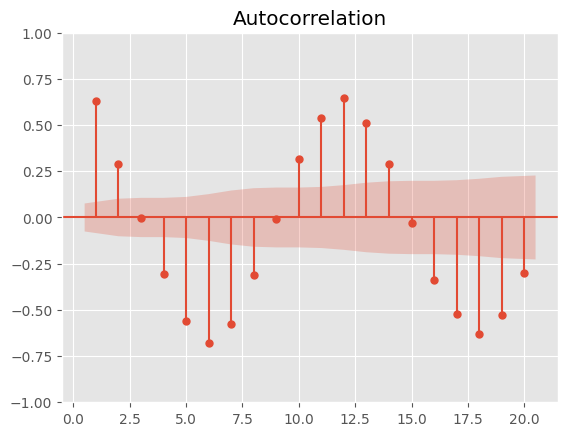

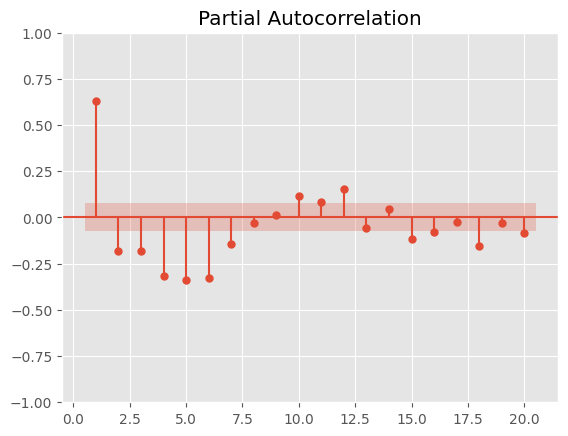

In [ ]:
sm.graphics.tsa.plot_acf(df_final.values.squeeze(), lags=20,zero=False);
sm.graphics.tsa.plot_pacf(df_final.values.squeeze(), lags=20,zero=False);

In [ ]:
len(df_final)

3032

In [ ]:
# 2,1,1 아니면 1,1,1

In [171]:
from statsmodels.tsa.arima.model import ARIMA
train_data=np.log(df['GATUN_LAKE_LEVEL(FEET)'][:560])
test_data=np.log(df['GATUN_LAKE_LEVEL(FEET)'][560:])
ARIMA_model=ARIMA(train_data,order=(1,1,1))
res=ARIMA_model.fit()
print(res.summary())

                                 SARIMAX Results                                  
Dep. Variable:     GATUN_LAKE_LEVEL(FEET)   No. Observations:                  560
Model:                     ARIMA(1, 1, 1)   Log Likelihood                1910.332
Date:                    Wed, 05 Jun 2024   AIC                          -3814.663
Time:                            06:03:35   BIC                          -3801.685
Sample:                                 0   HQIC                         -3809.595
                                    - 560                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3238      0.089      3.639      0.000       0.149       0.498
ma.L1          0.1583      0.078      2.030      0.042       0.005       0.311
sigma2      6.291e-0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [172]:
res.params

ar.L1     0.323849
ma.L1     0.158260
sigma2    0.000063
dtype: float64

In [173]:
train_data

DATE_LOG
1965-01-31    4.458566
1965-02-28    4.451478
1965-03-31    4.437011
1965-04-30    4.423416
1965-05-31    4.414950
                ...   
2012-04-30    4.436444
2012-05-31    4.444354
2012-06-30    4.447209
2012-07-31    4.441326
2012-08-31    4.451432
Name: GATUN_LAKE_LEVEL(FEET), Length: 560, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'Predictions: Train Set')

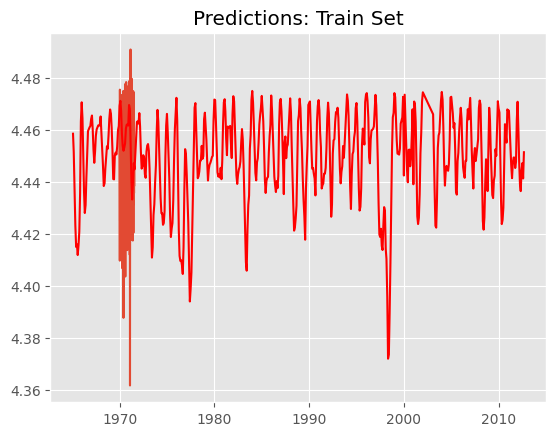

In [174]:
plt.plot(res.predict(start=1,end=len(train_data),dynamic=False))
plt.plot(train_data,color='red')
plt.title("Predictions: Train Set")

Text(0.5, 1.0, 'Residual Plot')

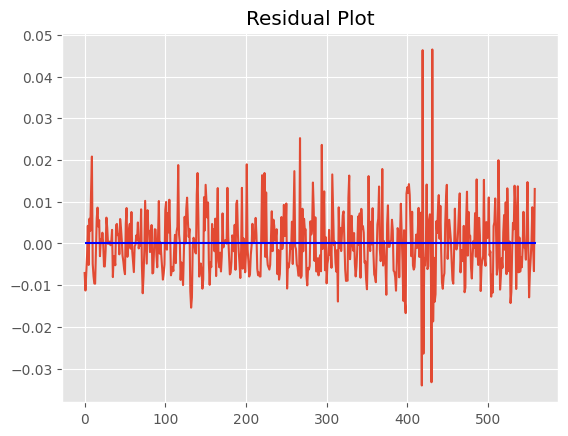

In [176]:
plt.plot(res.resid.values[1:])
plt.hlines(0,xmin=0,xmax=len(res.resid.values[1:]),color='blue')
plt.title("Residual Plot")

In [183]:
pred_ar.index=df.index[:560]

In [241]:
train_21=np.log(df[df.index <='2021-12-31'])
test_21=np.log(df[df.index >'2021-12-31'])

In [242]:
train_23=np.log(df[df.index <='2023-12-31'])
test_23=np.log(df[df.index >'2023-12-31'])

In [243]:
train_24=np.log(df[df.index <='2024-05-31'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'Predictions: Test Set')

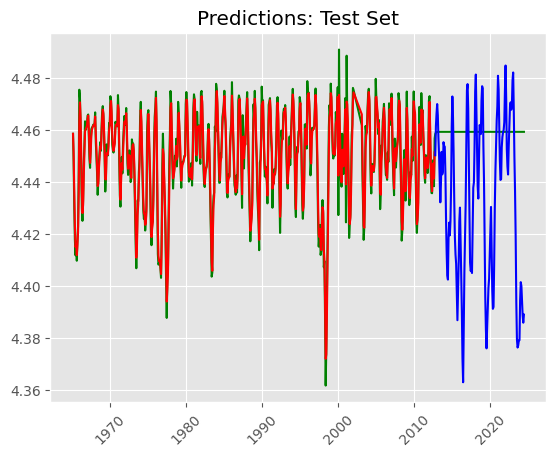

In [187]:
pred_ar = res.predict(start=1,end=len(train_data)+len(test_data),dynamic=False)
pred_ar.index=df.index[:701]
plt.plot(pred_ar,color='green')
plt.plot(train_data,color='red')
plt.plot(test_data,color='blue')
plt.xticks(rotation=45)
plt.title("Predictions: Test Set")

ma

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'Predictions: Train Set')

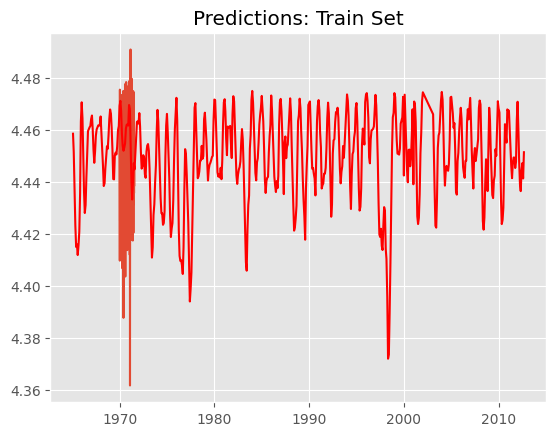

In [188]:
plt.plot(res.predict(start=1,end=len(train_data),dynamic=False))
plt.plot(train_data,color='red')
plt.title("Predictions: Train Set")

Text(0.5, 1.0, 'Residual Plot')

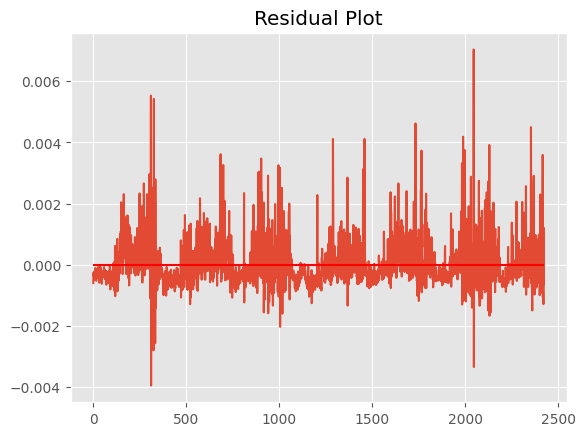

In [ ]:
plt.plot(res.resid.values[1:])
plt.hlines(0,xmin=0,xmax=len(res.resid.values[1:]),color='red')
plt.title("Residual Plot")

Text(0.5, 1.0, 'Predictions: Test Set')

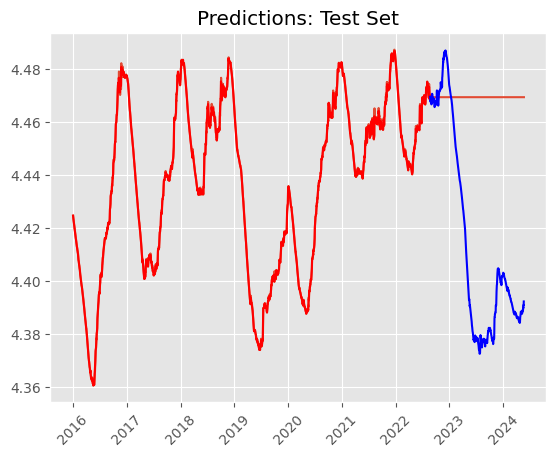

In [ ]:
pred_ma = res.predict(start=1,end=len(train_data)+len(test_data),dynamic=False)
plt.plot(pred_ma)
plt.plot(train_data,color='red')
plt.plot(test_data,color='blue')
plt.xticks(rotation=45)
plt.title("Predictions: Test Set")

autoarima

In [189]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.3 MB/s eta 0:00:00


In [244]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [245]:
am_model_21=pm.auto_arima(train_21,sesonal=True,d=1,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4630.365, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4335.929, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4643.742, Time=0.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4599.726, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4337.918, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-4529.193, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-4703.460, Time=3.45 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-4749.996, Time=4.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-4755.759, Time=1.58 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-4597.435, Time=1.30 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-4734.197, Time=2.97 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=-4640.664, Time=4.57 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-4715.363, Time=2.17 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-4679.199, Time=0.67 sec
 ARIM

In [246]:
am_model_23=pm.auto_arima(train_23,sesonal=True,d=1,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4900.705, Time=4.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4481.284, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4807.299, Time=1.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4760.542, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4483.232, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-4720.023, Time=2.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-4778.633, Time=2.53 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-4778.975, Time=5.71 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-4724.578, Time=5.40 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-4654.144, Time=0.69 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-4779.613, Time=9.16 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-4838.732, Time=6.97 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-4881.185, Time=11.07 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-4895.503, Time=1.73 sec
 ARI

In [247]:
am_model_24=pm.auto_arima(train_24,sesonal=True,d=1,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4825.639, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4517.679, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4843.858, Time=1.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4797.786, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4519.603, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-4726.442, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-4902.961, Time=2.84 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-4947.168, Time=3.50 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-4911.097, Time=0.70 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-4963.449, Time=3.86 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-4936.769, Time=2.76 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-4906.121, Time=1.69 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=-4964.428, Time=6.23 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=-4940.824, Time=5.31 sec
 ARIM

In [248]:
fcast21=am_model_21.predict(len(test_21))
fcast21

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


672    4.479080
673    4.464413
674    4.449283
675    4.437102
676    4.432535
677    4.437561
678    4.442938
679    4.446629
680    4.450182
681    4.456205
682    4.464662
683    4.469917
684    4.465499
685    4.453930
686    4.441317
687    4.431115
688    4.428035
689    4.433956
690    4.439933
691    4.444201
692    4.448250
693    4.454491
694    4.463201
695    4.468710
696    4.464756
697    4.453585
698    4.441380
699    4.431530
700    4.428618
dtype: float64

In [249]:
fcast23=am_model_23.predict(len(test_23))
fcast23

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


696    4.394262
697    4.380877
698    4.369069
699    4.359095
700    4.354580
dtype: float64

In [251]:
fcast24=am_model_24.predict(12)
fcast24

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


701    4.393744
702    4.399115
703    4.402154
704    4.404392
705    4.408235
706    4.416510
707    4.421740
708    4.415664
709    4.404936
710    4.395391
711    4.387224
712    4.382788
dtype: float64

In [259]:
df

,GATUN_LAKE_LEVEL(FEET)
DATE_LOG,
1965-01-31,86.363548
1965-02-28,85.753571
1965-03-31,84.521935
1965-04-30,83.380667
1965-05-31,82.677742
...,...
2024-01-31,81.437742
2024-02-29,80.986207
2024-03-31,80.518065


In [272]:
after_index=['2024-06-30','2024-07-31','2024-08-31','2024-09-30','2024-10-31','2024-11-30','2024-12-31','2025-01-31','2025-02-28','2025-03-31','2025-04-30','2025-05-31']

In [273]:
fcast24.index=after_index

In [277]:
fcast24.index=pd.to_datetime(fcast24.index)

In [266]:
fcast24

2024-06-30    4.393744
2024-07-31    4.399115
2024-08-31    4.402154
2024-09-30    4.404392
2024-10-31    4.408235
2024-11-30    4.416510
2024-12-31    4.421740
2025-01-31    4.415664
2024-02-28    4.404936
2024-03-31    4.395391
2024-04-30    4.387224
2024-05-31    4.382788
dtype: float64

In [275]:
fcast21.index=test_21.index
fcast23.index=test_23.index
fcast24.index=after_index

[]

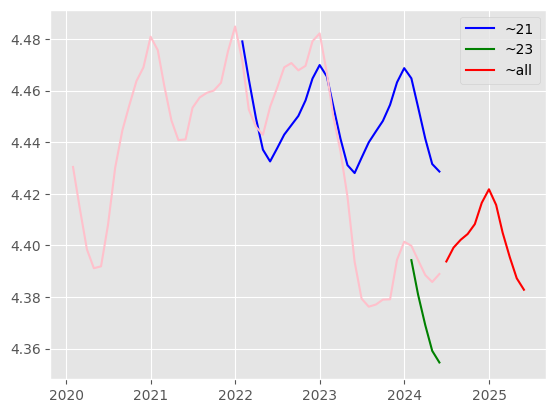

In [280]:
plt.plot(fcast21,color='blue',label='~21')
plt.plot(fcast23,color='green',label='~23')
plt.plot(fcast24,color='red',label='~all')
plt.plot(np.log(df[df.index>='2020-01-01']),color='pink')
plt.legend()
plt.plot()

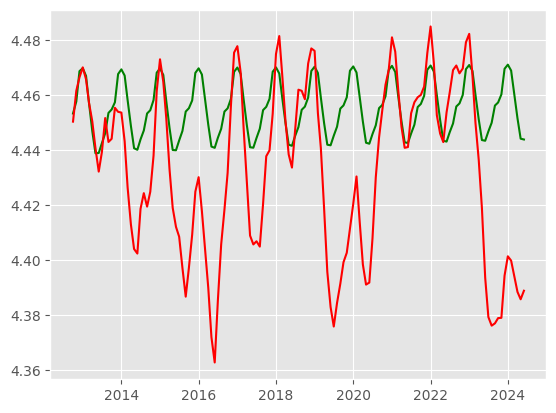

In [221]:
plt.plot(fcast2,color='green')
plt.plot(test_data,color='red')

In [ ]:

fcast1 = pd.Series(fcast1, index=index_4_weeks)
fcast1 = fcast1.rename("Auto ARIMA")